## POPULARITY BASED RECOMMENDER SYSTEM

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline 
import pandas as pd
import numpy as np
import time
import pylab as pl
from musicrecolib.dataset.load_data import LoadData

In [27]:
df = LoadData().get_users_songs()
df.head()

,user_id,song_id,listen_count,track_id,artist_name,track_name,track_uri,popularity,duration_ms,explicit,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,artist_id
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBSUJE12A6D4F8CF5,2,TRPLAXZ128F4292406,Jorge Drexler,12 segundos de oscuridad,2ECKXkpPAxky87ohawpaeD,37,246826,0,...,-8.176,0,0.0327,0.11900,0.000412,0.103,0.0396,126.051,4,4ssUf5gLb1GBLxi1BhPrVt
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,TRHNCIR128F42334A5,Kanye West,Stronger,4fzsfWzRhPawzqhX8Qt9F3,82,311867,1,...,-7.858,0,0.1530,0.00564,0.000000,0.408,0.4900,103.992,4,5K4W6rqBFWDnAN6FQUkS6x
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,TRUATNS128F423457D,Kanye West,Stronger,4fzsfWzRhPawzqhX8Qt9F3,82,311867,1,...,-7.858,0,0.1530,0.00564,0.000000,0.408,0.4900,103.992,4,5K4W6rqBFWDnAN6FQUkS6x
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,TRYBNIB128F428E704,Jack Johnson,Constellations,3deZQXBY8CJFbrTc2PbU34,59,201640,0,...,-12.640,1,0.0355,0.46800,0.000043,0.117,0.4430,122.012,4,3GBPw9NK25X1Wt2OUvOwY3
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOEWFWM12A8C1308BA,1,TRLQPQJ128F42AA94F,Gipsy Kings,Soy,076jKe7yfP979o1QLKMIA2,47,189987,0,...,-12.321,0,0.0653,0.29700,0.000267,0.127,0.9050,114.656,4,3jc496ljiyrS3ECrD7QiqL


In [28]:
df = df.head(10000)

In [29]:
from lib.popularity import popularity_recommender_py
from lib.precisionrecallcopy import remove_percentage, precision_recall_calculator, plot_precision_recall

In [30]:
#splitting into train and test data
train_data, test_data = train_test_split(df, test_size = 0.20, random_state=0)

In [31]:
# we fit the model to the train data
pm = popularity_recommender_py()
pm.create(train_data, 'user_id', 'song_id')

#user the popularity model to make some prediction
user_id = df['user_id'][5]
pm.recommend(user_id)

,user_id,song_id,score,Rank
2682,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOTWSXL12A8C143349,64,1.0
1888,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SONYKOW12AB01849C9,57,2.0
2165,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOPXKYD12A6D4FA876,55,3.0
450,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODGVGW12AC9075A8D,53,4.0
1434,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOKLRPJ12A8C13C3FE,49,5.0
1453,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOKOXWU12AF72AD1BC,45,6.0
1803,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SONIQRE12AF72A2B02,41,7.0
2681,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOTWNDJ12A8C143984,36,8.0
389,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOCVTLJ12A6310F0FD,35,9.0
715,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFLJQZ12A6D4FADA6,35,10.0


In [32]:
start = time.time()

#Define what percentage of users to use for precision recall calculation
user_sample = 0.05

#Call method to calculate precision and recall values
(pm_avg_precision_list, pm_avg_recall_list) = precision_recall_calculator(test_data, train_data, pm, user_sample)

end = time.time()
print(end - start)

Length of user_test_and_training:577
Length of user sample:28
Getting recommendations for user:edc8b7b1fd592a3b69c3d823a742e1a064abec95
Getting recommendations for user:2aa991d816553f172338ba4834193aba92abb4c3
Getting recommendations for user:0a00498b9d607844a8826184ae7278097d1c008a
Getting recommendations for user:c01f9838d66929bd2494eb8e627054024a13d5c4
Getting recommendations for user:951945330eb5df161ac4f97729647514001cd102
Getting recommendations for user:3187e658fd71be99d68d96f3a61a436c8a607365
Getting recommendations for user:7aec2eb348ca2deace19d4829e4f4ddf48e3f912
Getting recommendations for user:57e32b0cf88d1e3344dab420971ba46d08dd34bd
Getting recommendations for user:fd13b9d49c54e00ff413fe3c095ba581c7fc611e
Getting recommendations for user:729162979d4c66c8d9b93652b30b8d9414ca06a7
Getting recommendations for user:087b949b3fde63ddab83d61d4ba82a6f162bd50c
Getting recommendations for user:e188e309e19e0847a05156d6efecc04e4bff4fc7
Getting recommendations for user:88196b0f0c0d76e81

Plotting precision recall curves.


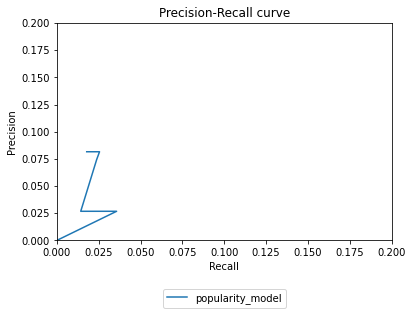

In [33]:
print("Plotting precision recall curves.")

plot_precision_recall(pm_avg_precision_list, pm_avg_recall_list, "popularity_model")